In [1]:
import matplotlib.pylab as plt
plt.style.use("/afs/ihep.ac.cn/users/l/luoxj/Style/Paper.mplstyle")
%config InlineBackend.figure_format = 'svg'
import numpy as np
import glob
evts_Neutron = {}
evts_AmBe = {}
v_R_Neutron = np.array([])
v_R_AmBe = np.array([])
v_gamma_ratio_AmBe = []
v_gamma_ratio_Neutron = []
study_center = True

v_name_source = ["AmBe", "Neutron"]
if study_center:
    v_name_source_load = ["AmBe_0_0_0", "neutron_0_0_0"]
else:
    v_name_source_load = ["AmBe", "Neutron"]
name_evts = "evts_"
name_gamma_ratio = "v_gamma_ratio_"
name_index_cut = "index_cut_"

for i_source, name_source in enumerate(v_name_source):
    if study_center:
        files_list = glob.glob(f"/afs/ihep.ac.cn/users/l/luoxj/sk_psd/predict_withpdgdep_{v_name_source_load[i_source]}/predict_*.npz")
        f = np.load(f"/afs/ihep.ac.cn/users/l/luoxj/sk_psd/predict_withpdgdep_{v_name_source_load[i_source]}/predict_0.npz", allow_pickle=True)
    else:
        if name_source == "Neutron":
            files_list = glob.glob("/afs/ihep.ac.cn/users/l/luoxj/sk_psd/predict_withpdgdep/predict_*.npz")
            f = np.load("/afs/ihep.ac.cn/users/l/luoxj/sk_psd/predict_withpdgdep/predict_0.npz", allow_pickle=True)
        else:
            files_list = glob.glob(f"/afs/ihep.ac.cn/users/l/luoxj/sk_psd/predict_withpdgdep_{name_source}/predict_*.npz")
            f = np.load(f"/afs/ihep.ac.cn/users/l/luoxj/sk_psd/predict_withpdgdep_{name_source}/predict_0.npz", allow_pickle=True)

    evts_0 = f["dir_events"].item()
    locals()[name_evts+name_source] = {}
    for key in evts_0.keys():
        locals()[name_evts+name_source][key] = []
    for file in files_list:
        f = np.load(file, allow_pickle=True)
        evts_load = f["dir_events"].item()
        for key in evts_load.keys():
            locals()[name_evts+name_source][key].extend(evts_load[key])
    for key in locals()[name_evts+name_source].keys():
        try:
            locals()[name_evts+name_source][key] = np.array(locals()[name_evts+name_source][key])
        except Exception:
            continue
    locals()["v_R_"+name_source] = np.sqrt(np.sum(locals()[name_evts+name_source]["vertex"]**2, axis=1))/1000

    v_pdg = locals()[name_evts+name_source]["pdg_pdgdep"][0]
    index_lepton = (v_pdg==22) | (v_pdg==11) | (v_pdg==-11)
    index_hadron = [not item for item in index_lepton]
    locals()[name_gamma_ratio+name_source] = []
    for i in range(len(locals()[name_evts+name_source]["equen_pdgdep"])):
        locals()[name_gamma_ratio+name_source].append(
            1-np.sum(locals()[name_evts+name_source]["equen_pdgdep"][i][index_hadron])
            /np.sum(locals()[name_evts+name_source]["equen"][i]) )
    locals()[name_gamma_ratio+name_source] = np.array(locals()[name_gamma_ratio+name_source])

<ipython-input-1-4df0417f90cd>:46: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  locals()[name_evts+name_source][key] = np.array(locals()[name_evts+name_source][key])


In [2]:
print(evts_Neutron.keys())

dict_keys(['equen', 'edep', 'pdg', 'init_p', 'vertex', 'pdg_pdgdep', 'equen_pdgdep', 'edep_pdgdep', 'PSD', 'h_time', 'PSD_with_charge', 'h_time_with_charge', 'name_file_source', 'entry_source', 'h_time_truth', 'h_time_with_charge_truth', 'lepton_ratio'])


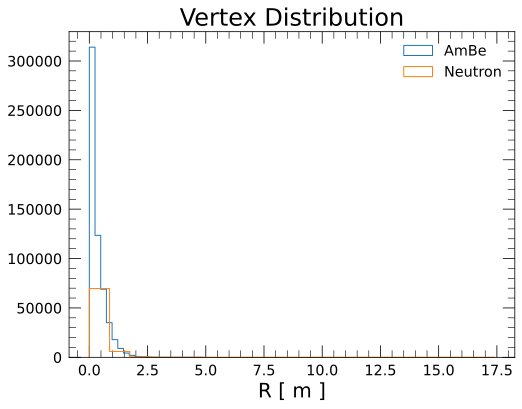

In [3]:

plt.hist(v_R_AmBe, histtype="step", bins=20, label="AmBe")
plt.hist(v_R_Neutron, histtype="step", bins=20, label="Neutron")
plt.xlabel("R [ m ]")
plt.title("Vertex Distribution")
plt.legend()


In [4]:
# print(evts_Neutron["equen"])
index_cut_equen_Neutron = (evts_Neutron["equen"]<31) & (evts_Neutron["equen"]>12)
index_cut_vertex_Neutron = v_R_Neutron**3 < 4096
index_cut_Neutron = index_cut_vertex_Neutron & index_cut_equen_Neutron

# index_cut_equen_AmBe = (evts_AmBe["equen"]>=0) & (evts_AmBe["equen"]>=6)
index_cut_equen_AmBe = (evts_AmBe["equen"]>=0)
index_cut_vertex_AmBe = v_R_AmBe**3 < 4096
index_cut_AmBe = index_cut_vertex_AmBe & index_cut_equen_AmBe

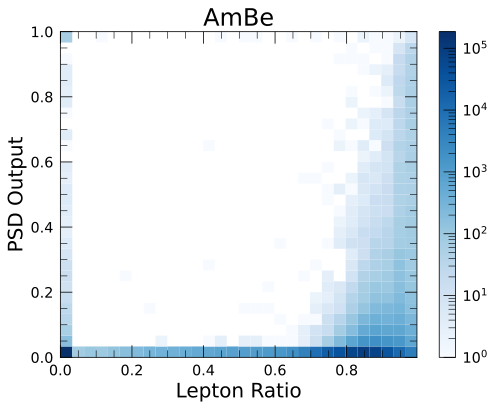

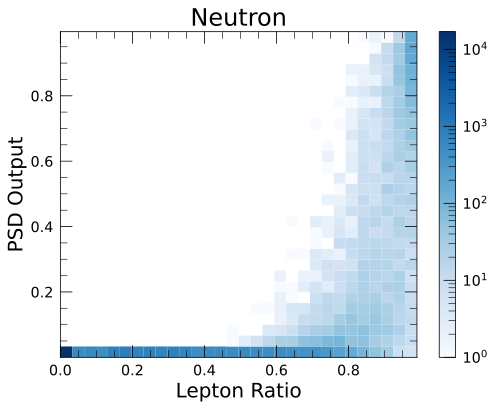

In [5]:
from  matplotlib.colors import LogNorm
for name_source in v_name_source:
    plt.figure()
    locals()[name_gamma_ratio+name_source][locals()[name_gamma_ratio+name_source]<0]=0
    plt.hist2d(locals()[name_gamma_ratio+name_source][locals()[name_index_cut+name_source]],
               locals()[name_evts+name_source]["PSD"][locals()[name_index_cut+name_source]],
               norm=LogNorm(), bins=(30, 30), cmap="Blues")
    plt.colorbar()
    # plt.xlim(0,1)
    # plt.ylim(0,1)
    plt.xlabel("Lepton Ratio")
    plt.ylabel("PSD Output")
    plt.title(name_source)
    plt.savefig(f"./figure/PSD_R_lepton_{name_source}.png")

<ipython-input-19-ca76c4115a62>:25: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.errorbar(GetBinCenter(h_edges),h_time/n_sum ,yerr=np.sqrt(h_time)/n_sum, Ls="none", marker="o", markersize=2,color=v_colors[j])


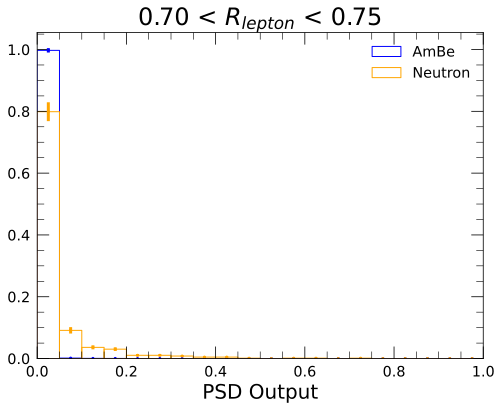

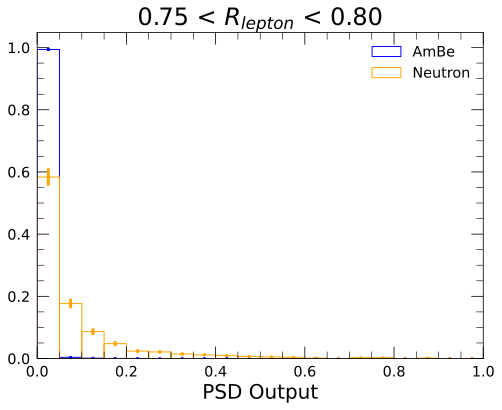

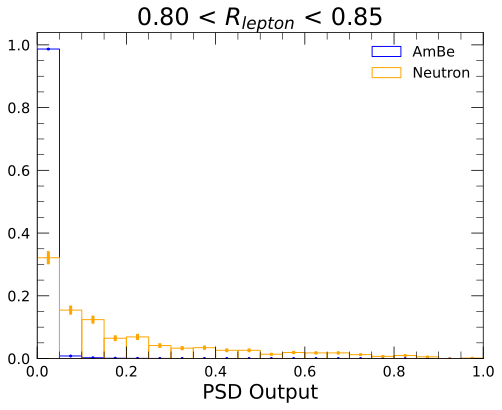

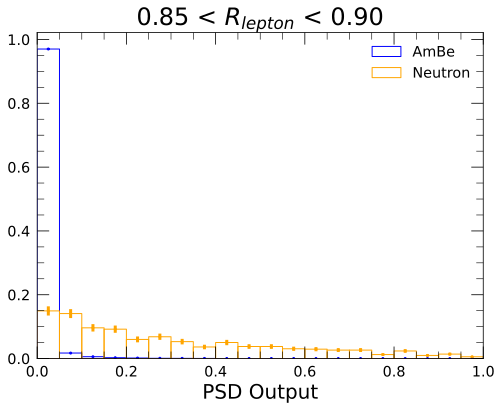

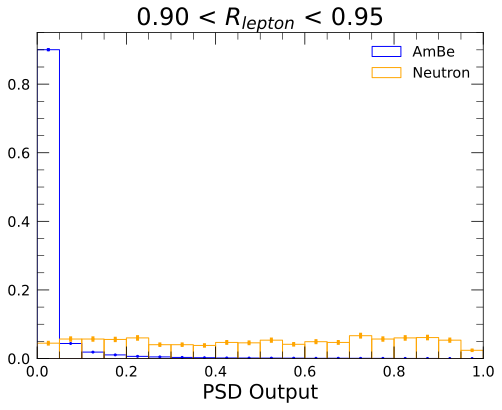

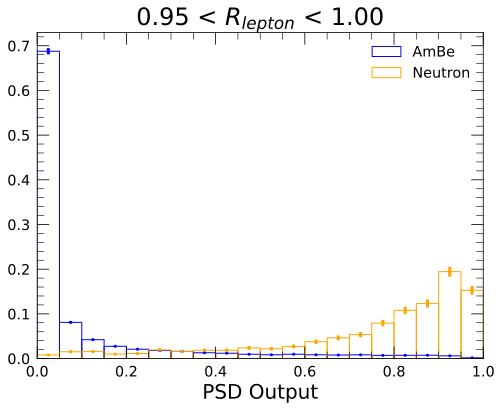

In [19]:
def GetBinCenter(edge):
    return (edge[:-1]+edge[1:])/2
# Compare PSD distributions with the same gamma ratio

n_bins = np.arange(0, 1.1, 0.05)
n_bins_gamma_ratio = np.arange(0.7, 1, 0.05)
#n_bins_gamma_ratio = [0.9, 1.0]
dir_v_n_with_PSD_cut = {"AmBe":[], "Neutron":[]}
dir_v_n_with_PSD_cut_sigma = {"AmBe":[], "Neutron":[]}
v_colors = ["blue", "orange"]
for i in range(len(n_bins_gamma_ratio)-1):
    plt.figure()
    down_limit_gamma_ratio = n_bins_gamma_ratio[i]
    up_limit_PSD_gamma_ratio = n_bins_gamma_ratio[i+1]
    name_index_cut_gamma_ratio = "index_cut_gamma_ratio_"
    for j,name_source in enumerate(v_name_source):
        locals()[name_index_cut_gamma_ratio+name_source] = (locals()[name_gamma_ratio+name_source]>=down_limit_gamma_ratio) & \
                                        (locals()[name_gamma_ratio+name_source]<=up_limit_PSD_gamma_ratio) &\
                                        locals()[name_index_cut+name_source]
        h_time, h_edges = np.histogram(locals()[name_evts+name_source]["PSD"][locals()[name_index_cut_gamma_ratio+name_source]], bins=n_bins)
                 # label=name_source, histtype="step", bins=n_bins)
        n_sum = np.sum(h_time)
        # n_sum = 1
        plt.bar(GetBinCenter(h_edges),h_time/n_sum, label=name_source, edgecolor=v_colors[j],width=np.diff(h_edges),fill=False,  )
        plt.errorbar(GetBinCenter(h_edges),h_time/n_sum ,yerr=np.sqrt(h_time)/n_sum, Ls="none", marker="o", markersize=2,color=v_colors[j])
        dir_v_n_with_PSD_cut[name_source].append(h_time[-2]/n_sum)
        dir_v_n_with_PSD_cut_sigma[name_source].append(h_time[-2]**0.5/n_sum)
    # plt.semilogy()
    plt.xlim(0,1)
    plt.title("{:.2f}".format(down_limit_gamma_ratio)+" < $R_{lepton}$ < "+"{:.2f}".format(up_limit_PSD_gamma_ratio))
    plt.xlabel("PSD Output")
    plt.legend()
    plt.savefig("./figure/Same_Lepton_Ratio_"+"{:.2f}_{:.2f}.png".format(down_limit_gamma_ratio, up_limit_PSD_gamma_ratio))


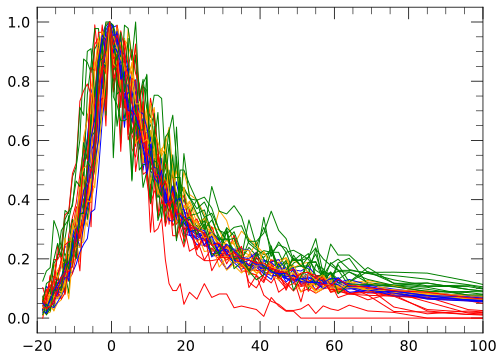

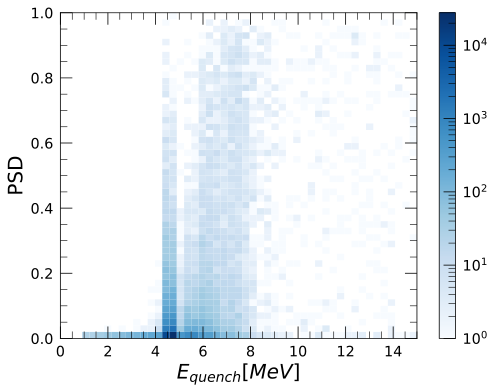

In [18]:
from scipy.signal import savgol_filter
def NormTimeProfile(h_time):
    h_time_norm = h_time/np.diff(bins_hist)
    # return savgol_filter(h_time_norm/np.max(h_time_norm), 11, 3)
    return h_time_norm/np.max(h_time_norm)
name_index_cut_right_upper = "index_cut_right_upper_"
name_index_cut_right_bottom = "index_cut_right_bottom_"
name_index_cut_left_bottom = "index_cut_left_bottom_"
name_index_cut_left_upper = "index_cut_left_upper_"
name_index_cut_right = "index_cut_right_"
for i, name_source in enumerate(v_name_source):
    locals()[name_index_cut_right_upper+name_source] = (locals()[name_evts+name_source]["lepton_ratio"]>0.8) & \
                                                        (locals()[name_evts+name_source]["PSD"]>0.8) & (locals()["index_cut_"+name_source])
    locals()[name_index_cut_right_bottom+name_source] = (locals()[name_evts+name_source]["lepton_ratio"]>0.8) &\
                                                       (locals()[name_evts+name_source]["PSD"]<0.2) & (locals()["index_cut_"+name_source])
    locals()[name_index_cut_left_bottom+name_source] = (locals()[name_evts+name_source]["lepton_ratio"]<0.2) &\
                                                        (locals()[name_evts+name_source]["PSD"]<0.2) & (locals()["index_cut_"+name_source])
    locals()[name_index_cut_left_upper+name_source] = (locals()[name_evts+name_source]["lepton_ratio"]<0.2) &\
                                                       (locals()[name_evts+name_source]["PSD"]>0.8) & (locals()["index_cut_"+name_source])
    locals()[name_index_cut_right+name_source] = (locals()[name_evts+name_source]["lepton_ratio"]>0.9) & (locals()["index_cut_"+name_source])
bins_hist = np.array([-19, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6,
             7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46,
             48, 50, 52, 54, 56, 58, 60, 62, 66, 72, 80, 90, 102, 116, 132, 150, 170, 192, 216, 242, 270, 300, 332, 366,
             402, 440, 480, 522, 566, 612, 660, 710, 762, 816])
plt.figure()
#fig, ax = plt.subplots(2)
for i in range(0, 10):
    plt.plot(GetBinCenter(bins_hist), NormTimeProfile(evts_Neutron["h_time"][index_cut_left_bottom_Neutron][i]),
             linewidth=1,color="green", label="PSD<0.2 & R_lepton<0.2")
    plt.plot(GetBinCenter(bins_hist), NormTimeProfile(evts_Neutron["h_time"][index_cut_right_upper_Neutron][i]),
             linewidth=1, color="red", label="PSD>0.8 & R_lepton>0.8")
    plt.plot(GetBinCenter(bins_hist), NormTimeProfile(evts_Neutron["h_time"][index_cut_right_bottom_Neutron][i]),
             linewidth=1,color="blue", label="PSD<0.2 & R_lepton>0.8")
    # plt.plot(GetBinCenter(bins_hist), NormTimeProfile(evts_AmBe["h_time"][index_cut_right_bottom_AmBe][i]),
    #          linewidth=1,color="orange", label="AmBe:PSD<0.2 & R_lepton>0.8")
    # plt.plot(GetBinCenter(bins_hist), NormTimeProfile(evts_AmBe["h_time"][index_cut_right_upper_AmBe][i]),
    #          linewidth=1,color="blue", label="AmBe:PSD>0.8 & R_lepton>0.8")
    # plt.plot(GetBinCenter(bins_hist), NormTimeProfile(evts_AmBe["h_time"][index_cut_left_bottom_AmBe][i]),
    #          linewidth=1,color="green", label="AmBe:PSD<0.2 & R_lepton<0.2")
    # plt.plot(GetBinCenter(bins_hist), NormTimeProfile(evts_AmBe["h_time"][index_cut_left_upper_AmBe][i]),
    #          linewidth=1,color="red", label="AmBe:PSD>0.8 & R_lepton<0.2")

    plt.xlim(-20, 100)
    #ax[1].set_xlim(-20, 50)
# plt.legend()
# print(evts_AmBe["equen"][index_cut_right_upper_AmBe][:20])
# print(evts_AmBe["equen"][index_cut_right_bottom_AmBe][:20])


plt.figure()
plt.hist2d( evts_AmBe["equen"][index_cut_right_AmBe], evts_AmBe["PSD"][index_cut_right_AmBe],cmap="Blues",
           norm=LogNorm(), bins=(np.linspace(0,15,50),50))
plt.ylabel("PSD")
plt.xlabel("$E_{quench} [ MeV ]$")
plt.colorbar()

{'AmBe': [5.147475163432337e-05, 1.9098183762724166e-05, 2.552800422063003e-05, 7.827175954915466e-06, 2.3526643924244205e-05, 0.001640162590030664], 'Neutron': [0.0, 0.0, 0.001379310344827586, 0.005578800557880056, 0.024043715846994537, 0.1527777777777778]}


<ipython-input-8-6032c24c5266>:24: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.errorbar(GetBinCenter(n_bins_gamma_ratio), v_diff_source_gamma_ratio_with_PSD, yerr=v_diff_source_gamma_ratio_with_PSD_sigma,


Text(0.5, 1.0, '$\\frac{|N^{PSD>0.95}_{Neutron}-N^{PSD>0.95}_{AmBe}|}{N^{PSD>0.95}_{Neutron}+N^{PSD>0.95}_{AmBe}}$')

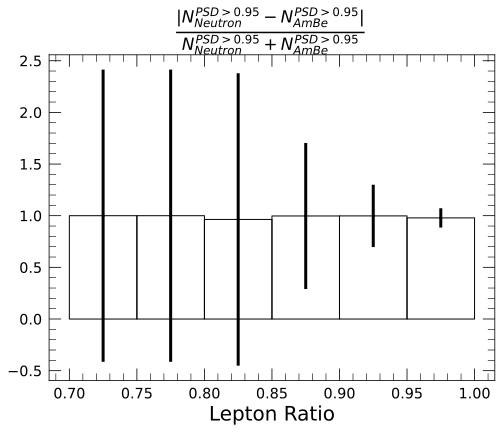

In [8]:
import sys
def GetErrorPropagation(x, y, x_sigma, y_sigma):
    """
    Calculate the error propagation of |x-y|/(x+y)
    """
    # print("x:\t", x, x_sigma)
    # print("y:\t", y, y_sigma)
    return np.sqrt( (x_sigma**2+y_sigma**2)/(x-y)**2 + (x_sigma**2+y_sigma**2)/(x+y)**2 )

sys.path.append("/afs/ihep.ac.cn/users/l/luoxj/root_tool/python_script/")
from PlotErrorBar import PLotDataWithErrorBar_numpy
print(dir_v_n_with_PSD_cut)
v_diff_source_gamma_ratio_with_PSD = []
v_diff_source_gamma_ratio_with_PSD_sigma = []
for i in range(len(dir_v_n_with_PSD_cut["AmBe"])):
    v_diff_source_gamma_ratio_with_PSD.append(np.absolute(dir_v_n_with_PSD_cut["Neutron"][i]-dir_v_n_with_PSD_cut["AmBe"][i])/(dir_v_n_with_PSD_cut["Neutron"][i]+dir_v_n_with_PSD_cut["AmBe"][i]))
    v_diff_source_gamma_ratio_with_PSD_sigma.append(
        GetErrorPropagation(x=dir_v_n_with_PSD_cut["Neutron"][i], y=dir_v_n_with_PSD_cut["AmBe"][i],
                            x_sigma=dir_v_n_with_PSD_cut_sigma["Neutron"][i], y_sigma=dir_v_n_with_PSD_cut_sigma["AmBe"][i]))
v_diff_source_gamma_ratio_with_PSD = np.array(v_diff_source_gamma_ratio_with_PSD)

# PLotDataWithErrorBar_numpy(v_diff_source_gamma_ratio_with_PSD, n_bins_gamma_ratio, (np.array(dir_v_n_with_PSD_cut["Neutron"])+np.array(dir_v_n_with_PSD_cut["AmBe"]))**0.5)
plt.bar(GetBinCenter(n_bins_gamma_ratio), v_diff_source_gamma_ratio_with_PSD,width=np.diff(n_bins_gamma_ratio), fill=False)
plt.errorbar(GetBinCenter(n_bins_gamma_ratio), v_diff_source_gamma_ratio_with_PSD, yerr=v_diff_source_gamma_ratio_with_PSD_sigma,
              Ls="none", marker="o", markersize=2, color="black")
plt.xlabel("Lepton Ratio")
plt.title(r"$\frac{|N^{PSD>0.95}_{Neutron}-N^{PSD>0.95}_{AmBe}|}{N^{PSD>0.95}_{Neutron}+N^{PSD>0.95}_{AmBe}}$")

# plt.plot(v_diff_source_gamma_ratio_with_PSD)